# Sedimentación

<div>
<img src="https://raw.githubusercontent.com/ahitaa/IAM-UV/main/Captura%20de%20pantalla%202023-08-29%20a%20las%2014.40.07.png" width="150"/>
</div>


$\sum F = F_g - F_b - F_d$ (1)

donde, 
    F_g es la fuerza de la gravedad
    F_b es la fuerza de flotación (bouyancy)
    F_d es la fuerza de rozamiento (drag)

$F_g = ma = \rho_pV_pg$ (2)

$F_b = ma = \rho_wV_pg$ (3)

$F_d = C_d\rho_wA_p\frac{v_s^2}{2}$ (4)

Si la partícula tiene una geometría esférica, su volumen y área proyectada se pueden obtener del siguiente modo:

$V_p = \frac{\pi}{6}d_p^3$ (5)

$A_p = \frac{\pi}{4}d_p^2$ (6)

Si sustituimos las ecuaciones de la (2) a la (6) en la ecuación (1) podemos obtener la velocidad terminal de sedimentación:

$v_s=\sqrt{\frac{4g(\rho_p-\rho_w)d_p}{3C_d\rho_w}}$



Ahora debemos definir el coeficiente de rozamiento $C_d$. La principal dificultad radica en que el $C_d$ depende las condiciones de flujo del medio, es decir, del valor del Reynolds. 

De modo que se puede obtener experimentalmente:

<div>
<img src="https://github.com/ahitaa/IAM-UV/blob/main/Captura%20de%20pantalla%202023-08-29%20a%20las%2014.47.05.png?raw=true" width="500"/>
</div>

## Ejercio: Cálculo de la velocidad terminal de sedimentación

Obtener la velocidad terminal de sedimentación para la arena en una solución de agua a 10ºC para partículas de diámetros de 50 y 190 $\mu m$ y densidad de 2650 $kg/m^3$

Primeramente suponemos un régimen de flujo laminar, es decir, donde el Re < 2, de modo que la ecuación de la velocidad de sedimentación nos queda expresada del siguiente modo:

$C_d=\frac{24}{Re}$

$Re=\frac{\rho_w v_s d_p}\mu{}$

$v_s=\frac{g(\rho_p-\rho_w)d_p^2}{18\mu}$

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
g = 9.81       # m/s^2 aceleración de la gravedad
rho_w = 999.7  # densidad del agua kg/m3 a 10ºC 
mu = 1.307e-3  # Viscosidad del agua kg/m a 10ºC
rho_p = 2650   # Densidad particula
dp = 50e-6     # Diametro partícula 50um -> 50e-6 m
vs = (g*(rho_p-rho_w)*np.power(dp,2))/(18*mu)
print(f'vs : {vs:.5f} m/s')
print(f'vs : {vs*3600:.2f} m/h')

vs : 0.00172 m/s
vs : 6.19 m/h


Ahora evaluamos si el Reynolds para esta velocidad de sedimentación cumple que Re < 2

In [8]:
Re=(rho_w*vs*dp)/mu
print(f'Re = {Re:.2f}')

Re = 0.07


Verificamos que el valor del Reynolds cumple con la suposición de flujo laminar Re < 0.2 de modo que es válido el valor obtenido de la velocidad de sedimentación.

A continuación, realizamos el mismo procedimiento para la partícula de diámetro 190$\mu m$.

In [9]:
dp = 190e-6     # Diametro partícula 190um -> 190e-6 m
vs = (g*(rho_p-rho_w)*np.power(dp,2))/(18*mu)
print(f'vs : {vs:.5f} m/s')
print(f'vs : {vs*3600:.2f} m/h')
Re=(rho_w*vs*dp)/mu
print(f'Re = {Re:.2f}')

vs : 0.02484 m/s
vs : 89.43 m/h
Re = 3.61


Como la condición de flujo no se corresponde con régimen laminar (Re < 0.2), se debe utilizar otra ecuación empírica que represente el coeficiente de rozamiento $C_d$ en, por ejemplo, régimen transitorio: 

$C_d=\frac{18.5}{Re^{0.6}}$

que al sustituir en la vs nos queda la siguiente expresión para el régimen transitorio (2<Re<500):

$v_s=\left( \frac{g(\rho_p-\rho_w)d_p^{1.6}}{13.9\rho_w^{0.4}\mu^{0.6}} \right)^{1/1.4}$

In [10]:
vs = np.power(g*(rho_p-rho_w)*np.power(dp,1.6)/(13.9*np.power(rho_w,0.4)*np.power(mu,0.6)),1/1.4)
print(f'vs : {vs:.5f} m/s')
print(f'vs : {vs*3600:.2f} m/h')
Re=(rho_w*vs*dp)/mu
print(f'Re = {Re:.2f}')

vs : 0.02071 m/s
vs : 74.54 m/h
Re = 3.01


## Ejercio: Eficiencia eliminación partículas

Calcular la eficiencia de eliminación de partículas en un estanque de sedimentación rectangular de 4.5 m de profundidad, 6 m de ancho y 35 m de largo, para procesar un caudal volumétrico de 525 $m^3/h$. Obtener los parámetros de diseño requeridos y graficar las concentraciones de partículas de entrada y salida del afluente y efluente como una función del tamaño de particular utilizando un histrograma. La caracterización de la corriente de entrada es la siguiente:
<div>
<img src="https://github.com/ahitaa/IAM-UV/blob/main/table.png?raw=true" width="500"/>
</div>

Primeramente calculamos la velocidad crítica de sedimentación para las dimensiones del sedimentador:

$v_c = \frac{h_o}{\tau}=\frac{h_o·Q}{h_o·A}=\frac{Q}{A}=v_{of}(\frac{m^3}{m^2·h})$

In [11]:
Q = 525    # m3/h
W = 6      # m ancho
L = 35     # m largo
h_o = 4.5  # m profundidad
A = W*L
vc = Q/A
print(f' vof: {vc:0.1f} m/h')

 vof: 2.5 m/h


In [43]:
vs_particules = np.linspace(0, 4, 11, endpoint=True)
n_particules_in = [511, 657, 876, 1168, 1460, 1314, 657, 438, 292, 292]
vs_mean= np.linspace(0.2, 3.8, 10, endpoint=True)
data = pd.DataFrame({'vs': vs_mean, 'n_part_in': n_particules_in})
data

,vs,n_part_in
0,0.2,511
1,0.6,657
2,1.0,876
3,1.4,1168
4,1.8,1460
5,2.2,1314
6,2.6,657
7,3.0,438
8,3.4,292
9,3.8,292


In [37]:
percentage_remove = [] 
for vs in vs_mean:
    if vs<vc:
        percentage_remove.append(vs/vc)
    else:
        percentage_remove.append(1)

In [98]:
data['percentage'] = percentage_remove
data['n_part_out'] = data['n_part_in'] - data['percentage']*data['n_part_in']
data['n_part_out'] = data['n_part_out'].astype(int)
data

,vs,n_part_in,percentage,n_part_out,label
0,0.2,511,0.08,470,0.2
1,0.6,657,0.24,499,0.6
2,1.0,876,0.40,525,1.0
3,1.4,1168,0.56,513,1.4
4,1.8,1460,0.72,408,1.8
5,2.2,1314,0.88,157,2.2
6,2.6,657,1.00,0,2.6
7,3.0,438,1.00,0,3.0
8,3.4,292,1.00,0,3.4
9,3.8,292,1.00,0,3.8


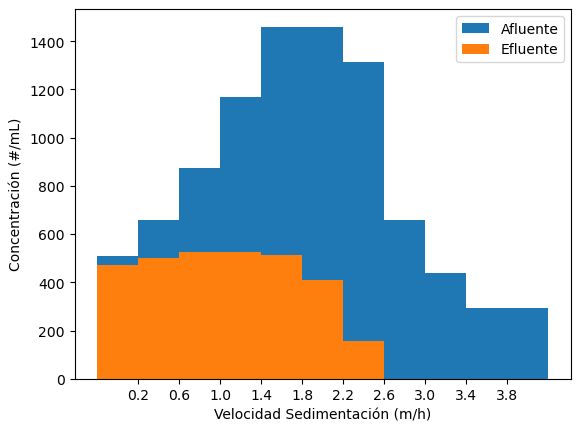

In [101]:
fig, ax = plt.subplots()
bar1 = ax.bar(data['vs'],data['n_part_in'], label = 'Afluente')
bar2 = ax.bar(data['vs'],data['n_part_out'], label = 'Efluente')
ax.set_xticks(data['vs'])
ax.legend()
ax.set_ylabel('Concentración (#/mL)')
ax.set_xlabel('Velocidad Sedimentación (m/h)')
plt.show()